In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensor("Placeholder:0", shape=(?,), dtype=float32)
<tf.Variable 'm:0' shape=() dtype=float32_ref>
<tf.Variable 'c:0' shape=() dtype=float32_ref>
[ 0.22195587  0.07398529 -0.07398529 -0.22195587]
[ 0.22195585  0.07398528 -0.07398528 -0.22195585]


<IPython.core.display.Javascript object>


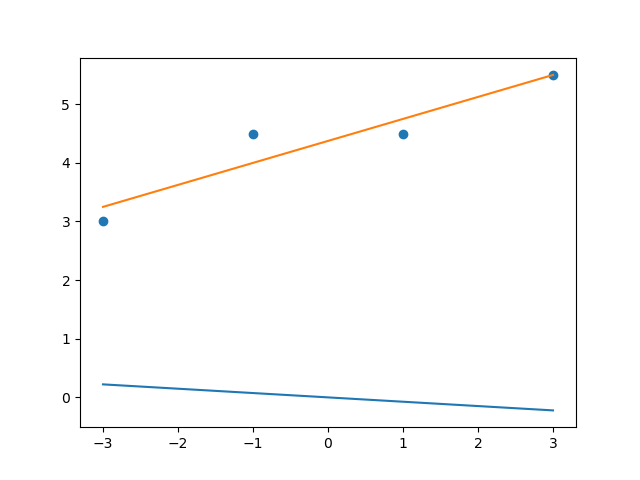

In [2]:
%matplotlib notebook
random.seed(9)

x_data = np.array([-3,-1,1,3])
t_data = np.array([3,4.5,4.5,5.5])

m_init = random.uniform(-1,1)
c_init = 0

x_input = tf.placeholder(dtype=tf.float32, shape=[None])
m = tf.Variable(m_init, dtype=tf.float32, name="m")
c = tf.Variable(c_init, dtype=tf.float32, name="c")

print(x_input)
print(m)
print(c)

mx = tf.multiply(m,x_input)
y_model = tf.add(mx,c)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output = sess.run(y_model, feed_dict={x_input: x_data})
print(output)

y_init = m_init*x_data + c_init
print(y_init)

fig = plt.figure()
plt.scatter(x_data, t_data)
plt.plot(x_data, y_init)
fig.canvas.draw()

target = tf.placeholder(dtype=tf.float32, shape=[None])
error = tf.square(tf.subtract(y_model, target))
loss = tf.reduce_sum(error)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_step = optimizer.minimize(loss)

iterations = 100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iterations):
        _, y_next = sess.run([train_step, y_model], feed_dict={x_input: x_data, target: t_data})

#         y_next = sess.run(y_model, feed_dict={x_input: x_data, target: t_data})

        line, = plt.plot(x_data, y_next)
        fig.canvas.draw()
        line.remove()
    
plt.plot(x_data, y_next)
fig.canvas.draw()
